In [4]:
import pandas as pd
train=pd.read_csv('train (1).csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
test=pd.read_csv('test (1).csv')


In [20]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [44]:
print(set(train['Embarked']))
print(set(train['Pclass']))
print(set(train['SibSp']))


{nan, 'C', 'S', 'Q'}
{1, 2, 3}
{0, 1, 2, 3, 4, 5, 8}


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [11]:
train.isnull().sum()                         # it shows how many null values are there in the dataset.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [34]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [22]:
import matplotlib.pyplot as plt

In [23]:
%matplotlib inline
import seaborn as sbs

In [37]:
def column(name):
    survived=train[train['Survived']==1][name].value_counts()
    dead=train[train['Survived']==0][name].value_counts()
    df=pd.DataFrame([survived,dead],index=['Survived','Dead'])
    df.plot(kind='bar',stacked=True,figsize=(5,3))


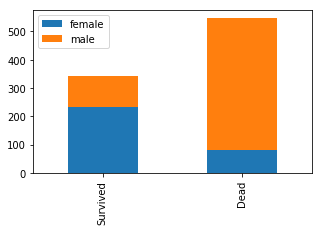

In [32]:
column('Sex')

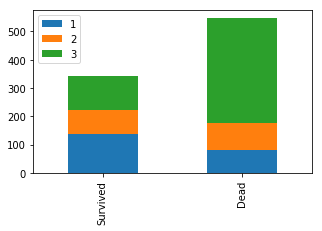

In [36]:
column('Pclass')

In [49]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train['Sex']=le.fit_transform(train['Sex'])               # this makes conversion of string to integer
test['Sex']=le.fit_transform(test['Sex'])



In [56]:
x_train=train[['Pclass','Sex', 'Age', 'SibSp','Parch', 'Fare']]
y_train=train['Survived']
x_test=test[['Pclass','Sex', 'Age', 'SibSp','Parch', 'Fare']]
y_test=gender['Survived']

In [74]:
print(x_train['Age'].median())
print(x_test['Age'].median())

28.0
27.0


In [89]:
x_train=x_train.fillna(value=28)
x_test=x_test.fillna(value=27)

In [135]:
# using Logistic Regression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
THRESHOLD=0.5
log.fit(x_train,y_train)
y_pred=log.predict(x_test)
Logi=accuracy_score(y_pred,y_test)
Logi

C:\Users\mahesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9665071770334929

In [136]:
set(y_train)

{0, 1}

In [137]:
# using Naive_Bayes
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
Naive=accuracy_score(y_pred,y_test)
Naive

0.930622009569378

In [138]:
# using KNN technique
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
clf=neighbors.KNeighborsClassifier(n_neighbors=23)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
knn=accuracy_score(y_pred,y_test)
knn

0.6794258373205742

In [139]:
# by using decision tree
from sklearn.tree import DecisionTreeClassifier
dec=DecisionTreeClassifier()
dec.fit(x_train,y_train)
y_pred=dec.predict(x_test)
Deci=accuracy_score(y_pred,y_test)
Deci


0.7344497607655502

In [140]:
# using stochastic gradient descent
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier()
sgd.fit(x_train,y_train)
y_pred=sgd.predict(x_test)
SGD=accuracy_score(y_pred,y_test)
SGD

C:\Users\mahesh\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.6602870813397129

In [141]:
# by using Perceptron technique
from sklearn.linear_model import Perceptron
per=Perceptron()
per.fit(x_train,y_train)
y_pred=per.predict(x_test)
Per=accuracy_score(y_pred,y_test)
Per

C:\Users\mahesh\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.5789473684210527

In [142]:
# using Random Forest
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=1000)
forest.fit(x_train,y_train)
y_pred=forest.predict(x_test)
Rand=accuracy_score(y_pred,y_test)
Rand

0.8205741626794258

In [143]:
# using support vector machine
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
svm=accuracy_score(y_pred,y_test)
svm

C:\Users\mahesh\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6746411483253588

In [144]:
models=pd.DataFrame({'Model':['Support Vector Machine','KNN','Perceptron','Logistic Regression','Stochastic Gradient Descent',
                             'Decision Tree','Naive_Bayes','Random Forest'],'Score':[svm,knn,Per,Logi,SGD,Deci,Naive,Rand]})
models.sort_values(by='Score',ascending=False)

,Model,Score
3,Logistic Regression,0.966507
6,Naive_Bayes,0.930622
7,Random Forest,0.820574
5,Decision Tree,0.734450
1,KNN,0.679426
0,Support Vector Machine,0.674641
4,Stochastic Gradient Descent,0.660287
2,Perceptron,0.578947
